# 신경망 학습 with [suanlab](https://www.youtube.com/watch?v=kHXrjyqyfE4)

### 필요한 모듈 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm #시간재는 모듈
plt.style.use('seaborn-whitegrid')

Init Plugin
Init Graph Optimizer
Init Kernel


### 미분과 기울기

- 어떤 함수를 나타내는 그래프에서 한 점의 미분값(미분계수)를 구하는 것은 해당 점에서의 접선을 의미

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Tangent_to_a_curve.svg/440px-Tangent_to_a_curve.svg.png)
<br /><sub>출처: https://ko.wikipedia.org/wiki/%EB%AF%B8%EB%B6%84</sub>

* 기울기는 **방향성**을 가짐
  + 이용할 미분 식 (수치 미분)  
      $\frac{df(x)}{dx} = \lim_{x \to \infty} \frac{f(x+h) - f(x-h)}{2h}$

* [주의] $ \ h \ $는 아주 작은 수를 뜻하는데, 예를 들어 $\ 10e-50 \ $ 정도의 수를 하면 파이썬은 이를 $0.0$으로 인식
* 따라서, 딥러닝에서 아주 작은 수를 정할 때 $\ 1e-4\ $ 정도로 설정해도 무방

In [2]:
def differential(f,x):
    eps = 1e-5
    diff_value = np.zeros_like(x) # x의크기를 0으로 채운것
    
    for i in range(x.shape[0]):
        temp_val = x[i]
        
        x[i] = temp_val + eps
        f_h1 = f(x)
        
        x[i] = temp_val - eps
        f_h2 = f(x)
        
        diff_value[i] = (f_h1 - f_h2) / (2 * eps)
        x[i] =temp_val
        
    return diff_value


# 2d 미분함수
def differential_2d(f, X):
    if X.ndim == 1:
        return differential(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = differential(f, x)
        
    return grad


## 하이퍼 파라미터(Hyper Parameter)
- 사람이 직접 설정해야하는 매개변수
- 학습이 되기전 미리 설정되어 상수취급
  - 손실 함수 (Cost Function)
  - 학습률 (Learning Rate)
  - 학습 반복 횟수 (Epochs)
  - 미니 배치 크기 (Batch Size)
  - 은닉층의 노드 개수 (Units)
  - 노이즈 (Noise)
  - 규제화 (Regularization)
  - 가중치 초기화 (Weights Initialization)

- 신경망의 매개변수인 가중치는 학습 알고리즘에 의해 **자동**으로 갱신

# 신경망 구조

## 퍼셉트론

- 인공신경망의 한 종류
- 다수의 입력($x_1, x_2, ..., x_n$)과 가중치($w_1, w_2, ..., w_n$)를 곱하여 그 값에 편향($bias$)을 더한 값이 어느 임계치 값($\theta$)을 초과하면 활성화 함수를 통과한 출력값을 내보냄
![perceptron](https://miro.medium.com/max/1400/1*ofVdu6L3BDbHyt1Ro8w07Q.png)
<br /><sub>출처: https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a</sub>

## 뉴런의 수학적 표현

![](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)
<br /><sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

$\qquad y = f(\sum_{i} w_ix_i + b) \quad $

  - $f\ $ : 활성화 함수
    - 임계값($\theta$)을 경계로 출력이 바뀜

  - $b\ \ $ :  편향
    - <u>결정 경계선을 원점에서부터 벗어나게 해줌</u>
    - 따로 표현이 없어도 기본적으로 존재한다고 생각

  - $\sum_{i} w_ix_i$ :$\quad $두 벡터의 내적으로 표현 가능
     
     $\\ \quad x_1w_1 + x_2w_2 +\ ... \ + x_nw_n = w^Tx$

## 활성화 함수(Activation Function)

- 입력 신호의 총합을 출력 신호로 변환하는 함수
- 활성화 함수에 따라 출력값이 결정
- 단층, 다층 퍼셉트론 모두 사용
- 대표적인 활성화 함수
  - Sigmoid
  - ReLU
  - tanh 
  - Identity Function
  - Softmax

-  하나의 layer에서 다음 layer로 넘어갈 때는 항상 활성화 함수를 통과
    
- [참고] 여러가지 활성화 함수  
 https://en.wikipedia.org/wiki/Activation_function  





### Sigmoid Function(시그모이드 함수)
- 이진분류(binary classification)에 주로 사용
  - 마지막 출력층의 활성화 함수로 사용
- 출력값이 0~1 의 값이며, 이는 **확률**로 표현 가능


$\quad y = \frac{1}{1 + e^{-x}}$



In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Softmax

- 다중 클래스 분류에 사용(Multi Class Classification)
- 입력값의 영향을 크게 받음  
  입력값이 크면 출력값도 큼
- 출력값을 확률에 대응가능
- 출력값의 **총합은 1**

- 수식  
 ### $ y_k = \frac{exp(a_k)}{\sum_{i=1}{exp(a_i)}}$

![](https://miro.medium.com/max/1400/1*670CdxchunD-yAuUWdI7Bw.png)
<br /><sub>출처: https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d</sub>

In [4]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y



### 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function, tanh)

 ### $ \quad y = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

![](https://miro.medium.com/max/1400/1*pHjovxWB8BvI71ZkS-o_3A.png)
<br /><sub>출처: https://medium.com/@toprak.mhmt</sub>



In [5]:
def tahn(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


### ReLU(Rectified Linear Unit)

- 가장 많이 쓰이는 함수 중 하나  
  
  ### $ y = \begin{cases}
0 \quad (x \le 0) \\
x \quad (x > 0)
\end{cases} $

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)
<br /><sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


In [6]:
def ReLU(x):
    if x > 0:
        return x
    else :
        return 0
    
    

- LeakyReLU

### $ \ \ f_a(x) = \begin{cases}
x \quad (x \ge 0) \\
ax \quad (x < 0)
\end{cases}$ 

![](https://i0.wp.com/knowhowspot.com/wp-content/uploads/2019/04/IMG_20190406_220045-1.jpg)
<br /><sub>출처: https://knowhowspot.com/technology/ai-and-machine-learning/artificial-neural-network-activation-function/</sub>

In [7]:
def LeakyReLU(x):
    a = 0.01
    return np.maximum(a*x, x)

- ELU(Exponential Linear Units)  

  $ f(\alpha, x) = \begin{cases}
\alpha \ (e^x - 1) \quad (x \le 0) \\
x \qquad \qquad (x > 0)
\end{cases}$  

![](https://www.researchgate.net/publication/331794632/figure/fig1/AS:736888264609792@1552699261431/Exponential-Linear-Unit-activation-function-input-output-mapping-The-activation-function.jpg)
<br /><sub>출처: https://www.researchgate.net/figure/Exponential-Linear-Unit-activation-function-input-output-mapping-The-activation-function_fig1_331794632</sub>

In [8]:
def ELU(x):
    alpha = 1.0
    return (x >= 0) * x + ( x < 0) * alpha * (np.exp(x)-1)

## 손실함수 (Loss Function, Cost Function)

- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
- 최적화 이론에서 최소화 하고자 하는 함수
- <u>**미분 가능한 함수 사용**</u>

![](https://drive.google.com/uc?id=1SMxO-SrTzm8-Fq07T_rdkLnukxgPlmuL)
<br /><sub>출처: https://zhuanlan.zhihu.com/p/85540935\</sub>

### 평균제곱오차(Mean Squared Error, MSE)
- 가장 많이 쓰이는 손실 함수 중 하나

- 오차가 커질수록 손실함수가 빠르게 증가
  - 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여

- 회귀 (Regression)에 쓰임

![](https://miro.medium.com/max/1152/1*EqTaoCB1NmJnsRYEezSACA.png)
<br /><sub>출처: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0</sub>

### $ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n ( y_i - \tilde{y}_i)^2 $

  - $y_i$ : 학습 데이터의 $i\ $번째 정답

  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

In [9]:
def mean_squared_error(pred_y, true_y):
    return np.mean(np.sum(np.square((y - pred_y))))

### 교차 엔트로피 오차(Cross Entropy Error, CEE)

- 이진 분류(Binary Classification), 다중 클래스 분류(Multi Class Classification)

- 소프트맥스(softmax)와 원-핫 인코딩(ont-hot encoding) 사이의 출력 간 거리를 비교

- 정답인 클래스에 대해서만 오차를 계산
  - 정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한히 커짐

### $ \qquad \qquad E = - \frac{1}{N}\sum_{n} \sum_{i}  y_i\ log\tilde{y}_i  $ 

- $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)

- $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

- $N$ : 전체 데이터의 개수

- $i$ : 데이터 하나당 클래스 개수

- $y = log(x)$는
  - $x$가 0에 가까울 수록 $y$값은 무한히 커짐
  
  - 1에 가까울 수록 0에 가까워짐
   
![](https://mathcracker.com/images/legacy/log-graph.png)
<br /><sub>출처: https://mathcracker.com/finding-the-log-graph</sub>

- 정답 레이블($y_i$)은 원-핫 인코딩으로 정답인 인덱스에만 1이고, 나머지는 모두 0

- 따라서, 위 수식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = - log\tilde{y}_i  $

  - 소프트맥스를 통해 나온 신경망 출력이 0.6이라면 $\ -log0.6 \fallingdotseq -0.51\ $이 되고,  
    신경망 출력이 0.3이라면  $\ -log0.3 \fallingdotseq -1.2\ $이 됨

  - 정답에 가까워질수록 오차값은 작아짐
  
  - 학습시, **원-핫 인코딩에 의해 정답 인덱스만 살아 남아 비교하지만, 정답이 아닌 인덱스들도 학습에 영향을 미침**  
    <u>다중 클래스 분류는 소프트맥스(softmax) 함수를 통해 전체 항들을 모두 다루기 때문</u>

![](https://miro.medium.com/max/836/1*T8KWtAn8FkAcsg8RsjiZ6Q.png)
<br /><sub>출처: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a</sub>

In [10]:
def cross_entropy_error(pred_y, true_y):
    if true_y.ndim == 1:
        true_y = true_y.reshape(1, -1)
        pred_y = pred_y.reshape(1, -1)
        
    delta = 1e-7
    return -np.sum(true_y * np.log(pred_y +delta))

def cross_entropy_error_for_batch(pred_y, true_y):
    if true_y.ndim == 1:
        true_y = true_y.reshape(1, -1)
        pred_y = pred_y.reshape(1, -1)
        
    delta = 1e-7
    batch_size = pred_y.shape[0] #shape 크기만큼 배치가 나누어짐
    return -np.sum(true_y * np.log(pred_y +delta)) / batch_size #결과값을 배치로 나눔

#### 이진 분류에서의 교차 크로스 엔트로피(Binary Cross Entropy, BCE)

- 이진 분류 문제(Binary Classification Problem)에서도 크로스 엔트로피 오차를 손실함수로 사용 가능

### $ \qquad \qquad E = - \sum_{i=1}^2  y_i\ log\tilde{y}_i \\ 
\qquad \qquad \ \ \ = -y_1\ log\ \tilde{y}_1 - (1 - y_1)log(1-\ \tilde{y}_1) $  
$\qquad \qquad \qquad ( \because y_2 = 1 - y_1)$

- $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)

- $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력


- 2개의 클래스를 분류하는 문제에서  
  1번이 정답일 확률이 0.8이고, 실제로 정답이 맞다면 위 식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -1\ log\ 0.8 - (1 - 1)\ log\ (1 - 0.8)\\ 
\qquad \qquad \ \ \ = -log\ 0.8 \\
\qquad \qquad \ \ \ \fallingdotseq -0.22
$

- 반대로, 실제로 정답이 2번이었다면, 식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -0\ log\ 0.8 - (1 - 0)\ log\ (1 - 0.8)\\ 
\qquad \qquad \ \ \ = -log\ 0.2 \\
\qquad \qquad \ \ \ \fallingdotseq -1.61
$  


In [11]:
def cross_entropy_error_for_bin(pred_y, true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 -pred_y)))

## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

#### 데이터 로드

In [12]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 데이터 확인

In [13]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


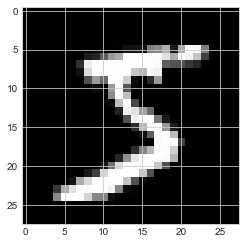

In [14]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

![](https://wikidocs.net/images/page/64066/conv2.png)

In [15]:
y_train[0]

5

#### 데이터 전처리 (Data Preprocessing)


다차원 배열을 1차원으로 바꾸는 함수 <br>
ravel(), reshape(), flatten() <br>
https://m.blog.naver.com/wideeyed/221533365486

In [16]:
def flatten_for_mnist(x):
    temp = np.zeros((x.shape[0], x[0].size)) #현재 데이터 사이즈대로 0으로채워진 temp생성
    
    for idx, data in enumerate(x):
        temp[idx, :] = data.flatten() # 0으로채워진 temp에 idx 및 전체범위에 1차원으로바꾼 data를 집어넣음 
        
    return temp

### 원-핫 인코딩(one-hot encoding)
- 범주형 변수를 표현할 때 사용
- 가변수(Dummy Variable)이라고도 함
- 정답인 레이블을 제외하고 0으로 처리  
https://wikidocs.net/22647

![](https://miro.medium.com/max/1400/0*T5jaa2othYfXZX9W.)
<sub>출처: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179</sub>


In [17]:
# 0~255 256개색표현하므로 255(n-1)으로 나눠서 정규화 ->가장큰건 1 가장작은건 0으로 표현됨 
x_train, x_test = x_train / 255.0, x_test/ 255.0


# 3차원(28 * 28 * 1)을 -> 1차원(784)로 전환
x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

# y를 one-hot-encoding  depth->원핫의 스칼라수를 결정 
# 정답이 0~9이므로 depth는 10
y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)


(60000, 784)
(10000, 784)
Metal device set to: Apple M1
(60000, 10)
(10000, 10)


2021-10-14 00:43:21.945365: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-14 00:43:21.945456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

#### 하이퍼 파라미터(Hyper Parameter)

In [20]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0] # 784


#### 2층 신경망으로 구현

In [21]:
class MyModel():
    
    def __init__(self):
                
        def weight_init(input_nodes, hidden_nodes, output_units):
            np.random.seed(777)
            
            params = {}
            params['w_1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes) #0.01 파라미터임 
            params['b_1'] = np.zeros(hidden_nodes)
            params['w_2'] = 0.01 * np.random.randn(hidden_nodes, output_units)
            params['b_2'] = np.zeros(output_units)
            
            return params
        
        self.params = weight_init(784, 64, 10) 
        # 784 -> x flatten한값 
        # 64 -> hidden nodes 파라미터 지정한것 
        #output_units mnist결과값 숫자 0~9이므로 10개 
        
        
    def predict(self, x):
        W_1, W_2 = self.params['w_1'], self.params['w_2']
        B_1, B_2 = self.params['b_1'], self.params['b_2']
        
        A1 = np.dot(x, W_1) + B_1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1, W_2) + B_2
        pred_y = softmax(A2) #Multiclass classification이므로 마지막에 softmax사용한것 
        
        return pred_y
    
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y, true_y)
    
    # classification 정확도 계산
    def accuracy(self, x, true_y):
        pred_y = self.predict(x) #현재 예측된 pred_y값
        y_argmax = np.argmax(pred_y, axis=1) # 예측한값의 인덱스를 반환 
        t_argmax = np.argmax(true_y, axis=1) # 실제값의 인덱스를 반환 
        
        accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0]) 
        # 예측한것과 실제값의 인덱스가 같은것-> 맞춘것이므로  shape크기만큼 나눠주면 ->정확도
        
        return accuracy
    
    def get_gradient(self, x, t):
        
        def loss_grad(grad):
            return self.loss(x, t)
        
        grads = {}
        grads['w_1'] = differential_2d(loss_grad, self.params['w_1'])
        grads['b_1'] = differential_2d(loss_grad, self.params['b_1'])
        grads['w_2'] = differential_2d(loss_grad, self.params['w_2'])
        grads['b_2'] = differential_2d(loss_grad, self.params['b_2'])
        
        return grads
                       

#### 모델 생성 및 학습

[batch size](https://losskatsu.github.io/machine-learning/epoch-batch/?fbclid=IwAR1xKJhQwrye0_2JfYBIkq6mQAYI7pq7IkBjesr2YMdkpUMd6-nYPryC7fU#1-%EC%82%AC%EC%A0%84%EC%A0%81-%EC%9D%98%EB%AF%B8)

In [22]:
model = MyModel()
train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()
for i in tqdm(range(epochs)):
    
    #batch인덱스를 만들어서 모델링 
    batch_idx = np.random.choice(train_size, batch_size) #train size 784 batch size 100
    x_batch = x_train[batch_idx]
    y_batch = y_train_ohe[batch_idx]
    
    grads = model.get_gradient(x_batch, y_batch)
    
    for key in grads.keys():
        model.params[key] -= lr * grads[key] 
    #기울기계산한것의 key값을 가져와서 lr을 곱한것으로 model의 params(weights)를 업뎃 
    #즉 x값과 초기 가중치를 64개, 2layer의 히든노드에 각 활성화함수(sigmoid, softmax)를 거쳐서 나온값 
    #y_hat과 y의 오차를 loss함수(cross entropy)로 구함 그거에 대한 미분값이 0이되는것이 예측을 정확하게 하는것이므로 
    # 그 미분값에 learning rate를 곱한것을 다시 weight parameter에 업데이트 해줌 1순환 한것 -> 1 epoch 
    # epoch를 반복할수록 오차가 줄어들고 정확도가 높아지는것이 신경망의 원리
    # 손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
    # 마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
    # 각 layer를 통과할 때마다 저장된 값을 이용 backward하면서 error 전달 파라미터 갱신하는방법 -> 오차역전파 backpropagation 
    
    
        
    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    
    train_accuracy = model.accuracy(x_train, y_train_ohe)
    test_accuracy = model.accuracy(x_test, y_test_ohe)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    
    print("Epoch: {}, Cost{}, Train Acc: {}, Test Acc: {}".format(i+1, loss, train_accuracy, test_accuracy))
          
end_time = time.time()
          
print("총학습소요시간 : {:.3f}s".format(end_time - start_time))

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1, Cost465.9060502398182, Train Acc: 0.10441666666666667, Test Acc: 0.1028
Epoch: 2, Cost361.84409502611004, Train Acc: 0.09751666666666667, Test Acc: 0.0974
총학습소요시간 : 289.785s
